In [ ]:
import os
from pathlib import Path
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

PROJECT_ROOT = Path().resolve().parent

DATA_DIR = PROJECT_ROOT / "train_data"

X_train = pd.read_csv(DATA_DIR / "X_train.csv")
y_train = pd.read_csv(DATA_DIR / "y_train.csv")




In [15]:
print("Shape of X_train:", X_train.shape)
print("\nInfo:")
print(X_train.info())

Shape of X_train: (959616, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959616 entries, 0 to 959615
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              959616 non-null  int64  
 1   Case Number     959616 non-null  object 
 2   Date            959616 non-null  object 
 3   Block           959616 non-null  object 
 4   IUCR            959616 non-null  object 
 5   Primary Type    959616 non-null  object 
 6   Description     959616 non-null  object 
 7   Arrest          959616 non-null  bool   
 8   Domestic        959616 non-null  bool   
 9   Beat            959616 non-null  int64  
 10  District        959616 non-null  int64  
 11  Ward            959593 non-null  float64
 12  Community Area  959545 non-null  float64
 13  FBI Code        959616 non-null  object 
 14  Year            959616 non-null  int64  
 15  Updated On      959616 non-null  object 
dtypes: bool(2), float6

In [16]:
print("\nMissing Values:")
print(X_train.isnull().sum())


Missing Values:
ID                 0
Case Number        0
Date               0
Block              0
IUCR               0
Primary Type       0
Description        0
Arrest             0
Domestic           0
Beat               0
District           0
Ward              23
Community Area    71
FBI Code           0
Year               0
Updated On         0
dtype: int64
ID                 0
Case Number        0
Date               0
Block              0
IUCR               0
Primary Type       0
Description        0
Arrest             0
Domestic           0
Beat               0
District           0
Ward              23
Community Area    71
FBI Code           0
Year               0
Updated On         0
dtype: int64


In [17]:
print("\nSummary Statistics:")
print(X_train.describe(include="all").T)


Summary Statistics:
                   count  unique                     top    freq  \
ID              959616.0     NaN                     NaN     NaN   
Case Number       959616  959518                JE266473       4   
Date              959616  502229  01/01/2022 12:00:00 AM     135   
Block             959616   35438        001XX N STATE ST    2396   
IUCR              959616     363                    0486   77403   
Primary Type      959616      32                   THEFT  212391   
Description       959616     340                  SIMPLE  113200   
Arrest            959616       2                   False  832951   
Domestic          959616       2                   False  774695   
Beat            959616.0     NaN                     NaN     NaN   
District        959616.0     NaN                     NaN     NaN   
Ward            959593.0     NaN                     NaN     NaN   
Community Area  959545.0     NaN                     NaN     NaN   
FBI Code          959616   

In [18]:
numeric_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

print("\nNumeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))


Numeric columns: ['ID', 'Beat', 'District', 'Ward', 'Community Area', 'Year']
Categorical columns: ['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Arrest', 'Domestic', 'FBI Code', 'Updated On']


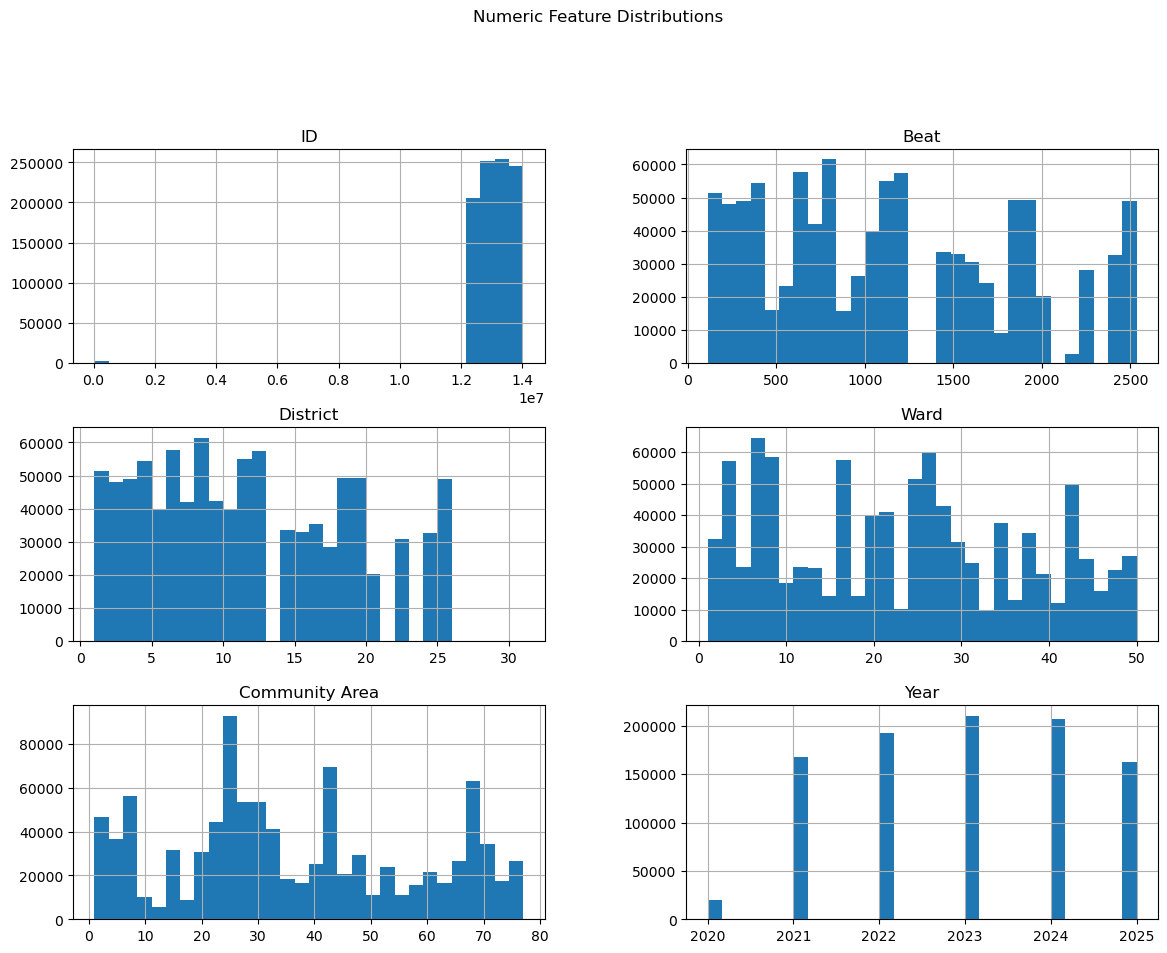

In [19]:
X_train[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.pyplot.suptitle("Numeric Feature Distributions", y=1.02)
plt.pyplot.show()

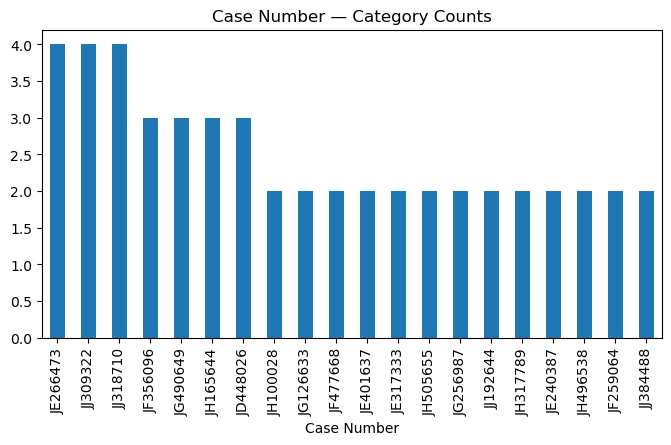

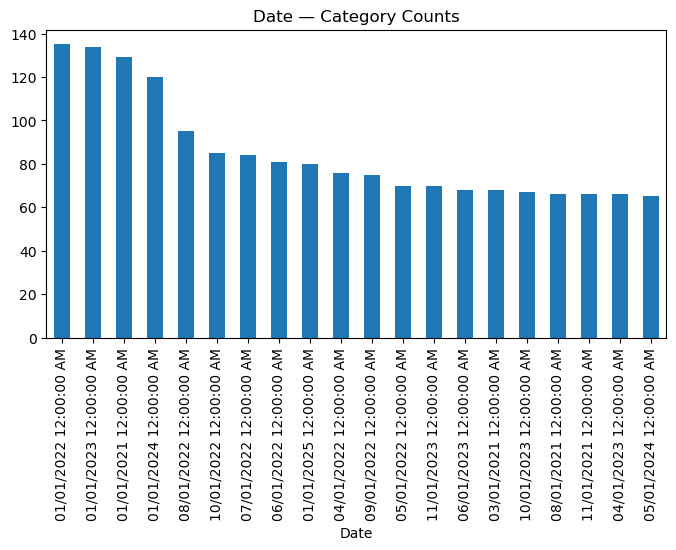

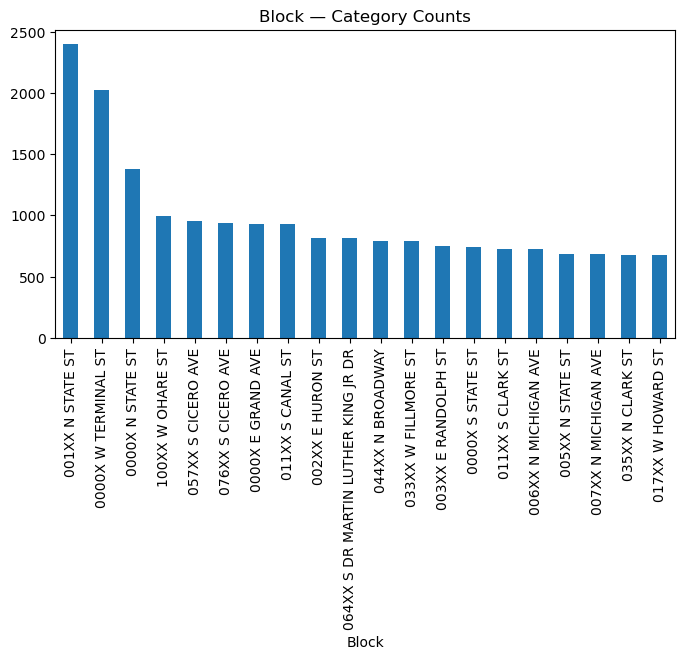

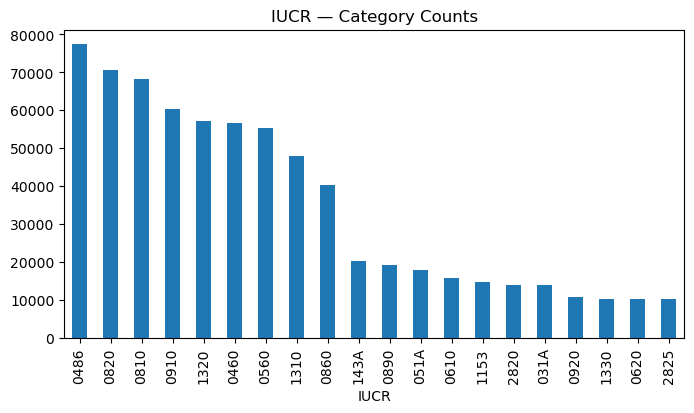

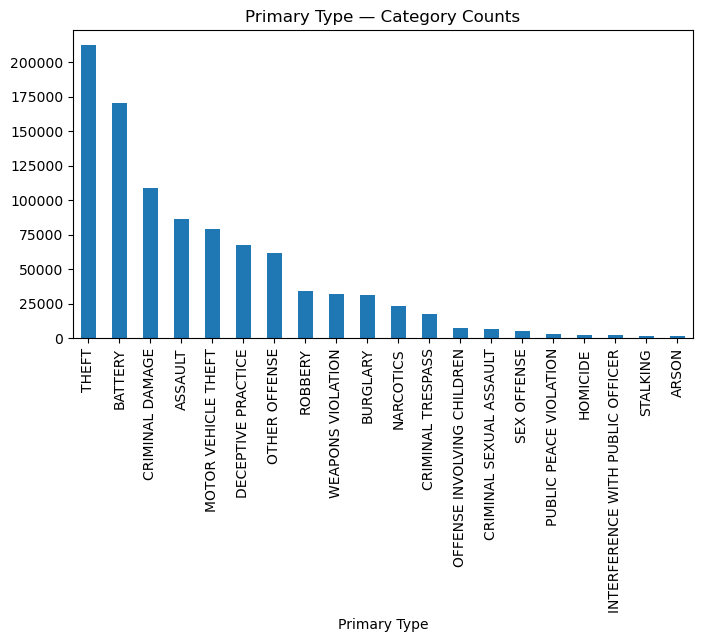

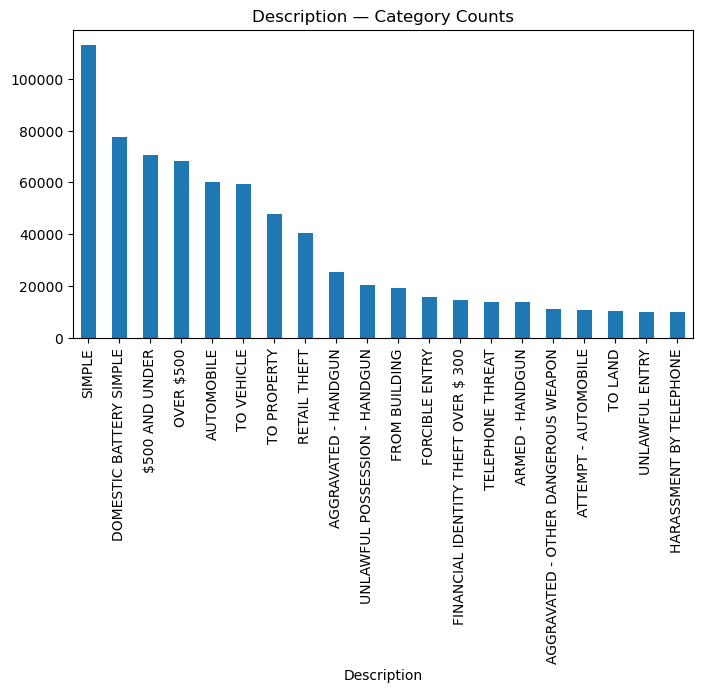

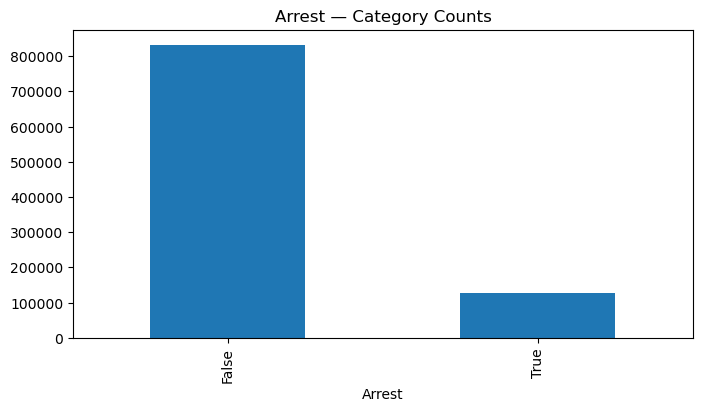

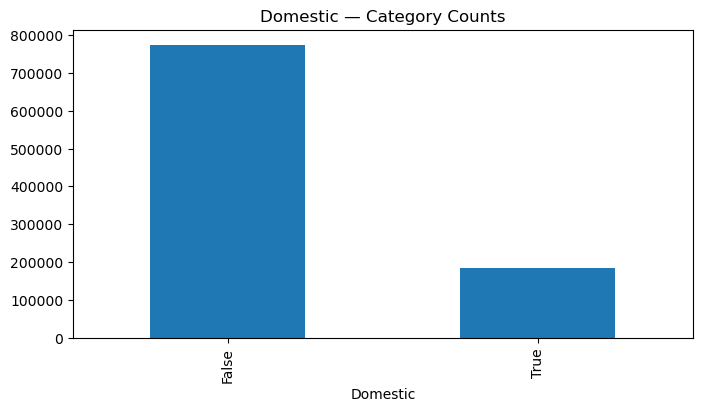

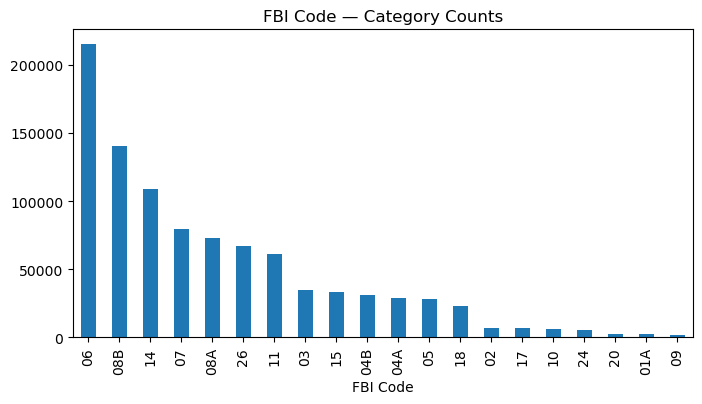

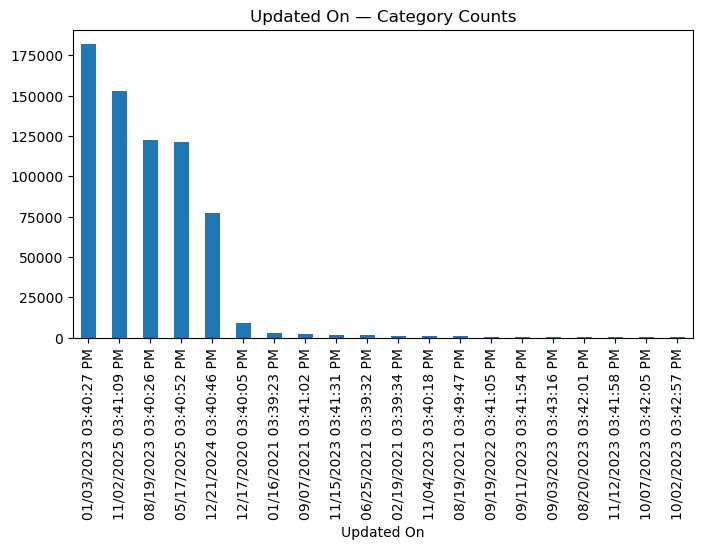

In [20]:
for col in categorical_cols:
    plt.pyplot.figure(figsize=(8, 4))
    X_train[col].value_counts().head(20).plot(kind="bar")
    plt.pyplot.title(f"{col} — Category Counts")
    plt.pyplot.show()

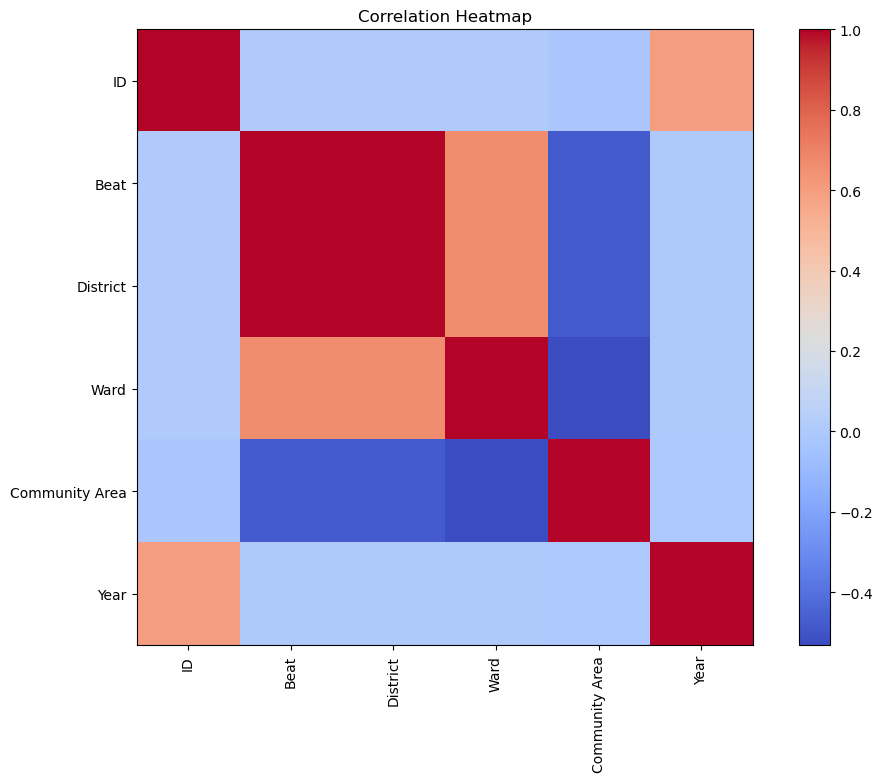

In [21]:
if len(numeric_cols) > 1:
    plt.pyplot.figure(figsize=(12, 8))
    corr = X_train[numeric_cols].corr()
    plt.pyplot.imshow(corr, cmap="coolwarm", interpolation="nearest")
    plt.pyplot.colorbar()
    plt.pyplot.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.pyplot.yticks(range(len(numeric_cols)), numeric_cols)
    plt.pyplot.title("Correlation Heatmap")
    plt.pyplot.show()